In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,ConfusionMatrixDisplay,recall_score

In [52]:
#data loading
columns=['UDI', 'Product ID','Type', 'Air temperature', 'Process temperature',
       'Rotational speed', 'Torque', 'Tool wear',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
df=pd.read_csv('ai4i2020.csv')
df.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '').replace(' ', '_') for col in df.columns]

print(f'data shape {df.shape}')

data shape (10000, 14)


In [53]:
df.columns

Index(['UDI', 'Product_ID', 'Type', 'Air_temperature_K',
       'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm',
       'Tool_wear_min', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [49]:
#data  exploring
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UDI                    10000 non-null  int64  
 1   Product_ID             10000 non-null  object 
 2   Type                   10000 non-null  object 
 3   Air_temperature_K      10000 non-null  float64
 4   Process_temperature_K  10000 non-null  float64
 5   Rotational_speed_rpm   10000 non-null  int64  
 6   Torque_Nm              10000 non-null  float64
 7   Tool_wear_min          10000 non-null  int64  
 8   Machine_failure        10000 non-null  int64  
 9   TWF                    10000 non-null  int64  
 10  HDF                    10000 non-null  int64  
 11  PWF                    10000 non-null  int64  
 12  OSF                    10000 non-null  int64  
 13  RNF                    10000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.1+ M

,UDI,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [50]:
df.head()

,UDI,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [54]:
#cleaning and preparing the data 
#1- drping the UDI and product ID
df.drop(['UDI','Product_ID'],axis=1,inplace=True)


In [55]:
#2- convert the categorical column 'Type' into numerical values [M,L,H] to [0,1,2]
df['Type']=df['Type'].map({'M':0,'L':1,'H':2})

# or by using label encoder
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#df['Type'] = le.fit_transform(df['Type'])


<Axes: xlabel='Machine_failure'>

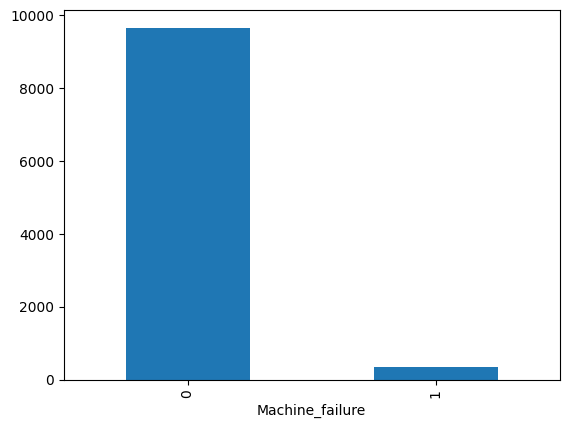

In [56]:
df['Machine_failure'].value_counts().plot(kind='bar')

In [58]:
#3- separate features from target
X=df.drop(['Machine_failure'],axis=1)
y=df['Machine_failure']

Exploratory Data Analysis (EDA) 

In [17]:
sns.set(style="whitegrid")

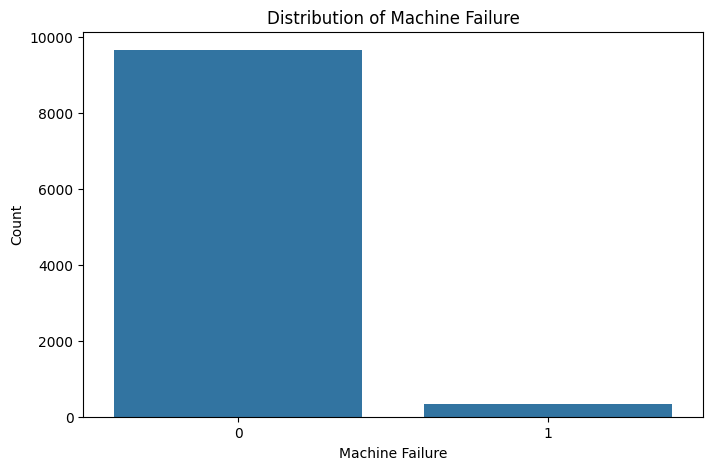

In [59]:
#plot 1 : Target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Machine_failure', data=df)
plt.title('Distribution of Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.show()


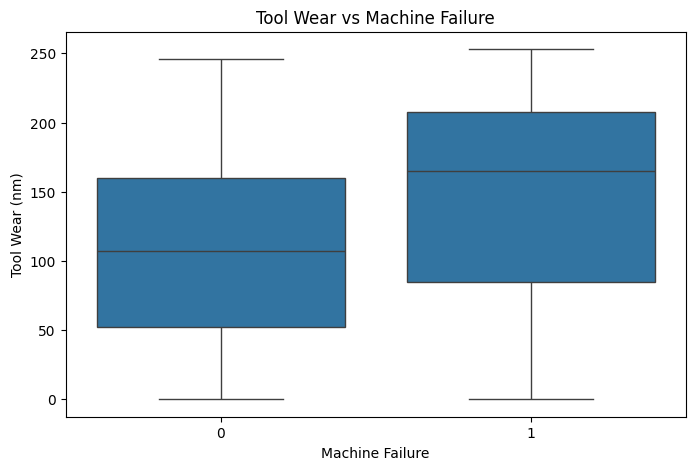

In [62]:
# plot 2 : Tool wear vs machine failure

plt.figure(figsize=(8, 5))
sns.boxplot(x='Machine_failure', y='Tool_wear_min', data=df)
plt.title('Tool Wear vs Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Tool Wear (nm)')
plt.show()

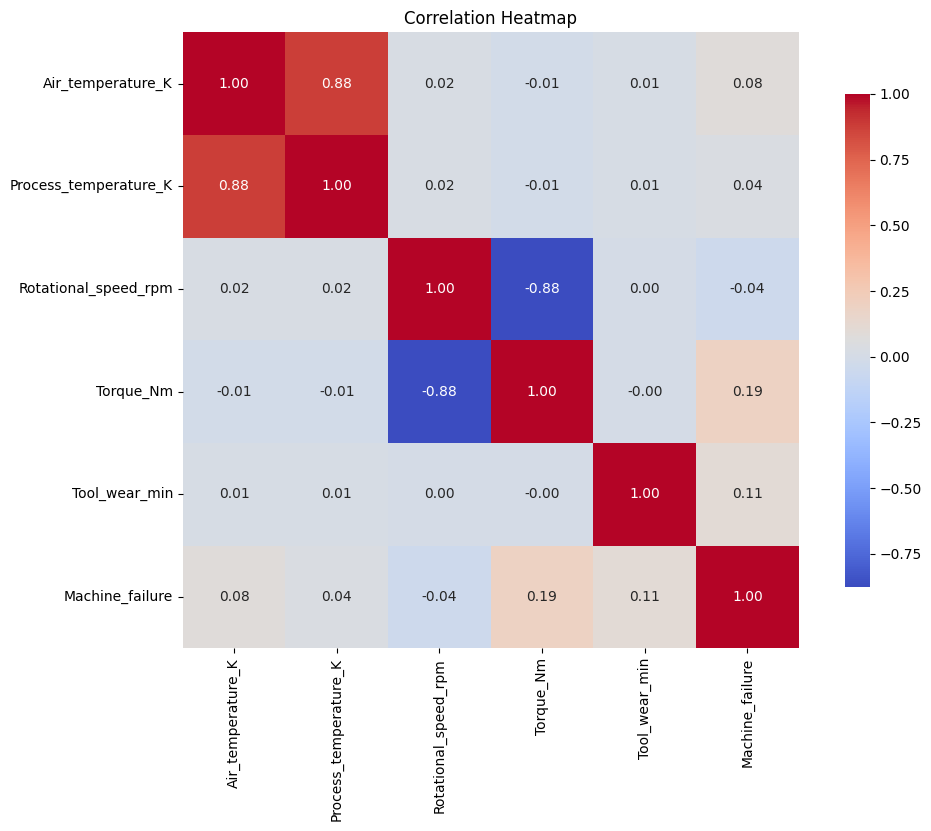

In [63]:
#plot 3 correlation heatmap 

plt.figure(figsize=(12, 8))
numeric_df=df[['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'Machine_failure']]
corr_matrix=numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [64]:
#initialize the model 

model=RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')



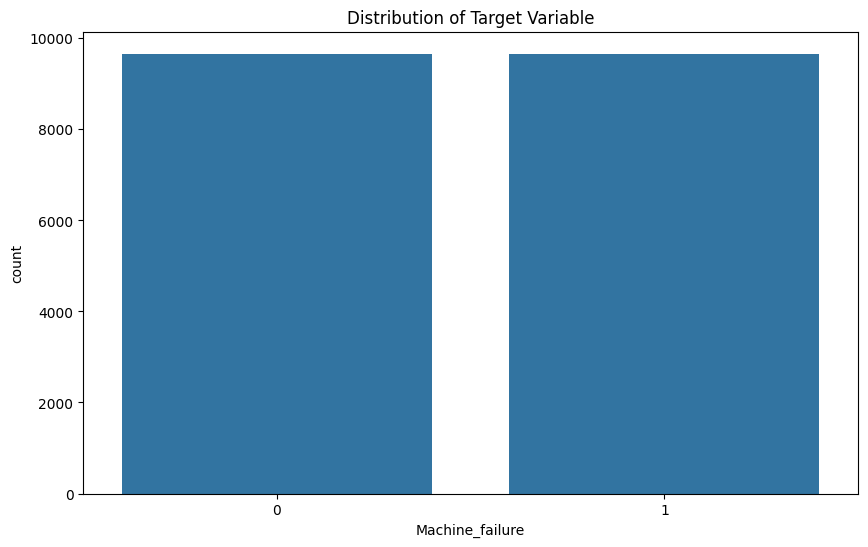

In [65]:
#fixing  the imbalanced dataset issue

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,stratify=y_resampled)


plt.figure(figsize=(10,6))
sns.countplot(x=y_resampled)
plt.title('Distribution of Target Variable')
plt.show()


In [66]:
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

In [67]:
#evaluating
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1933
           1       0.98      0.98      0.98      1932

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865



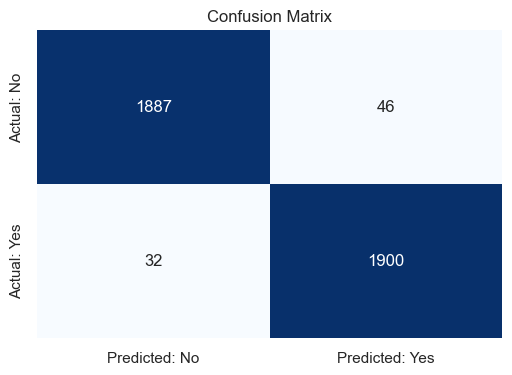

In [38]:

print(classification_report(y_test, y_pred))

# Plot a confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png', dpi=120, bbox_inches='tight')
plt.show()


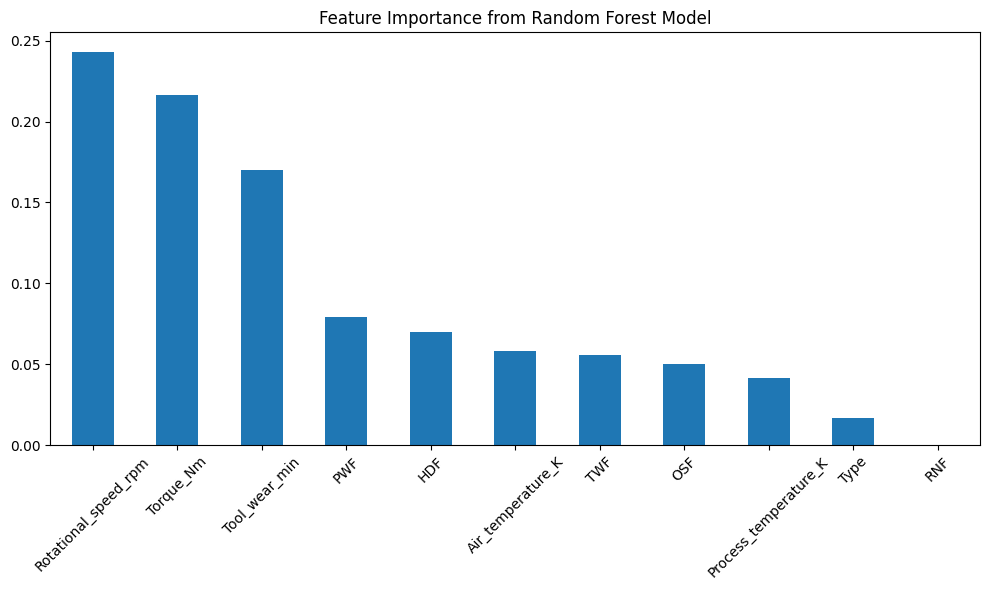

In [68]:

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=120, bbox_inches='tight')
plt.show()

Using xgboost

In [69]:
import xgboost as xgb

In [70]:
#spliting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (8000, 11), Test set: (2000, 11)


In [79]:
#Handle Class Imbalance by Calculating Scale Pos Weight
#Scale_pos_weight = (number of negative examples / number of positive examples)
scale_pos_weight = (y_train ==  0).sum() /(y_train == 1).sum()
print(f"Scale Pos Weight: {scale_pos_weight}")



Scale Pos Weight: 28.52029520295203


In [82]:
#define and train the xgb model
dtrain=xgb.DMatrix(X_train, label=y_train)
dtest=xgb.DMatrix(X_test, label=y_test)

params={
    'objective': 'binary:logistic',
    'eval_metric':['logloss','error'],
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'scale_pos_weight': scale_pos_weight,
    'seed':42
}    

num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

In [83]:
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label=1)

print(f"XGBoost Model Accuracy: {accuracy:.2f}")
print(f"XGBoost Model Recall: {recall:.2f}")

XGBoost Model Accuracy: 1.00
XGBoost Model Recall: 0.97


Detailed Classification Report:
              precision    recall  f1-score   support

  No_Failure       1.00      1.00      1.00      1932
     Failure       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



<Figure size 1000x800 with 0 Axes>

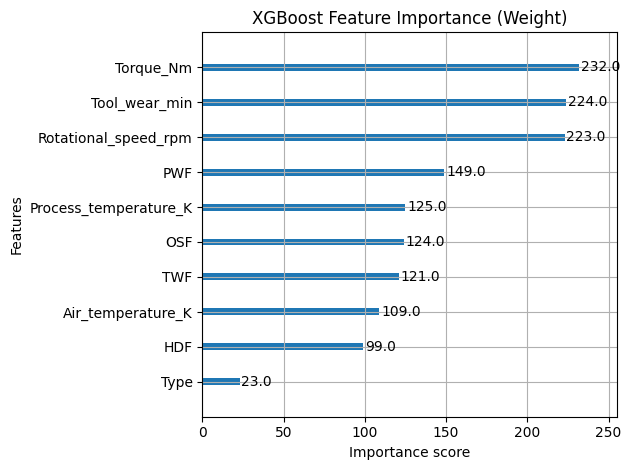

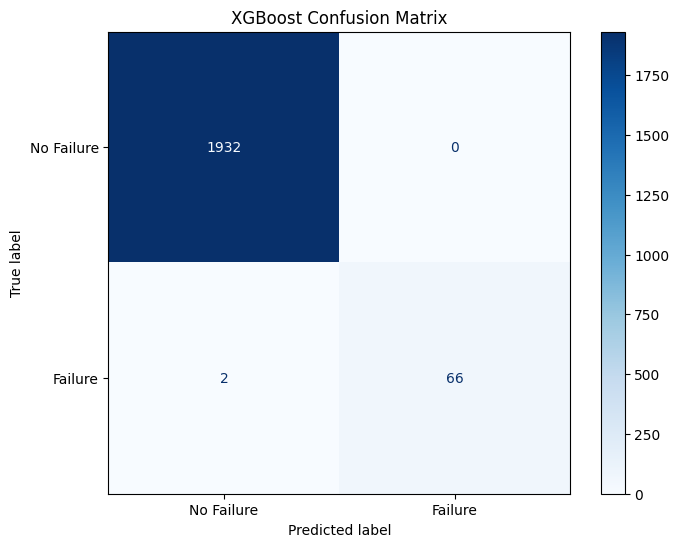

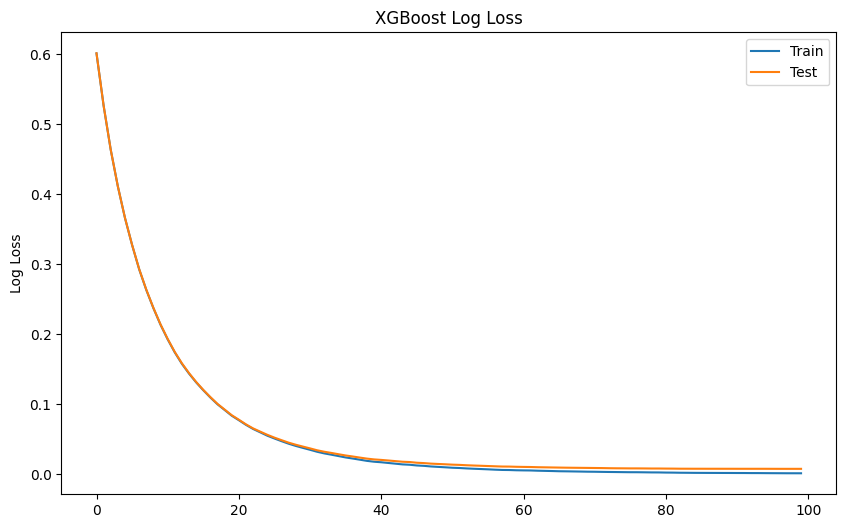

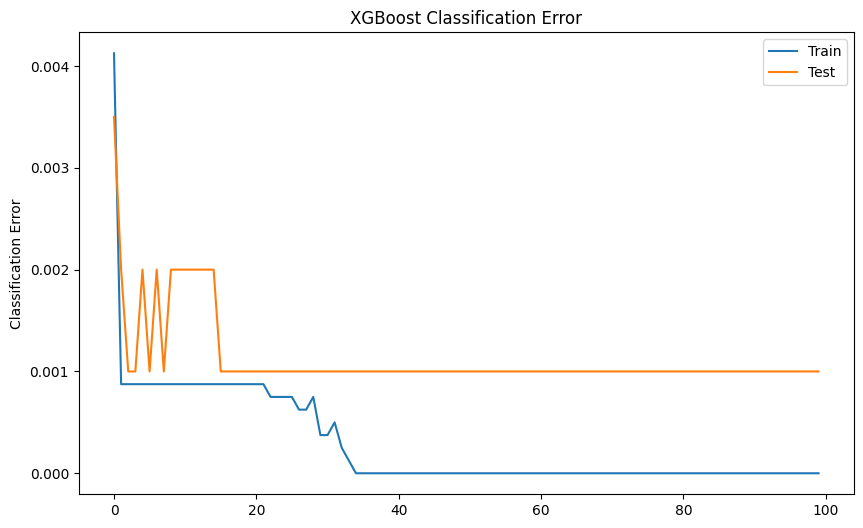

In [78]:
print("Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No_Failure', 'Failure']))

# Plot Feature Importance (XGBoost provides this built-in)
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, max_num_features=15, importance_type='weight') # 'weight' is the number of times a feature is used to split the data
plt.title('XGBoost Feature Importance (Weight)')
plt.tight_layout()
plt.savefig('./images/xgboost_feature_importance.png', dpi=120, bbox_inches='tight')
plt.show()

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('XGBoost Confusion Matrix')
plt.savefig('./images/xgboost_confusion_matrix.png', dpi=120, bbox_inches='tight')
plt.show()


# Evaluate on both training and test set during training
evals = [(dtrain, 'train'), (dtest, 'test')]
results = {}
model_with_eval = xgb.train(params, dtrain, num_rounds, evals=evals, evals_result=results, verbose_eval=False)

# Extract results
epochs = len(results['train']['error'])
x_axis = range(0, epochs)

# Plot log loss
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_axis, results['train']['logloss'], label='Train')
ax.plot(x_axis, results['test']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.savefig('./images/xgboost_log_loss.png', dpi=120, bbox_inches='tight')
plt.show()

# Plot classification error
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_axis, results['train']['error'], label='Train')
ax.plot(x_axis, results['test']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.savefig('./images/xgboost_error.png', dpi=120, bbox_inches='tight')
plt.show()
